#`Why do EDA`
- Most Important step of Model building

- Analysis and reporting

- Validate assumptions

- Handling missing values

- feature engineering

- detecting outliers

##`As We have allready done some preprocessing and cleaning, so we know that there are no missing values and we have allready done some feature engg.`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from scipy.stats import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import shapiro, kstest
from scipy.stats import zscore,f_oneway

In [ ]:
df=pd.read_csv('/content/cleaned_flights_data (1)')
df.head()

flight_year  flight_month  flight_day flight_date   airline    class  \
0         2023             6          26  2023-06-26  SpiceJet  economy   
1         2023             6          26  2023-06-26  SpiceJet  economy   
2         2023             6          26  2023-06-26   AirAsia  economy   
3         2023             6          26  2023-06-26   Vistara  economy   
4         2023             6          26  2023-06-26   Vistara  economy   

  departure_city  departure_time arrival_city  arrival_time  duration  price  \
0          Delhi            1135       Mumbai          1265       130   6013   
1          Delhi             380       Mumbai           520       140   6013   
2          Delhi             265       Mumbai           395       130   6016   
3          Delhi             620       Mumbai           755       135   6015   
4          Delhi             530       Mumbai           670       140   6015   

   Stops  
0      0  
1      0  
2      0  
3      0  
4      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   flight_year     300259 non-null  int64 
 1   flight_month    300259 non-null  int64 
 2   flight_day      300259 non-null  int64 
 3   flight_date     300259 non-null  object
 4   airline         300259 non-null  object
 5   class           300259 non-null  object
 6   departure_city  300259 non-null  object
 7   departure_time  300259 non-null  int64 
 8   arrival_city    300259 non-null  object
 9   arrival_time    300259 non-null  int64 
 10  duration        300259 non-null  int64 
 11  price           300259 non-null  int64 
 12  Stops           300259 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 29.8+ MB


In [ ]:
df.shape

(300259, 13)

In [ ]:
df.describe()

flight_year   flight_month    flight_day  departure_time  \
count     300259.0  300259.000000  300259.00000   300259.000000   
mean        2023.0       7.207035      14.51758      806.031476   
std            0.0       0.549479       9.29330      323.359577   
min         2023.0       6.000000       1.00000       10.000000   
25%         2023.0       7.000000       7.00000      510.000000   
50%         2023.0       7.000000      13.00000      775.000000   
75%         2023.0       8.000000      23.00000     1110.000000   
max         2023.0       8.000000      31.00000     1435.000000   

        arrival_time       duration          price          Stops  
count  300259.000000  300259.000000  300259.000000  300259.000000  
mean      943.823432     733.061540   21174.447460       0.924212  
std       363.093213     431.576729   23048.549457       0.398189  
min         5.000000       0.000000    1116.000000       0.000000  
25%       635.000000     405.000000    4831.000000       1.000000  
50%      1025.000000     675.000000    7499.000000       1.000000  
75%      1245.000000     970.000000   43159.000000       1.000000  
max      1439.000000    2990.000000  124917.000000       2.000000

#`Column Types`
Numerical - `flight_year,flight_month,flight_day,departure_time		arrival_time,duration,price`

Categorical - `airline	,class	,departure_city,arrival_city,Stops.`




In [ ]:
df[df['duration']==2990.000000]

flight_year  flight_month  flight_day flight_date    airline    class  \
193995         2023             6          27  2023-06-27  Air India  economy   
194465         2023             7           4  2023-07-04  Air India  economy   

       departure_city  departure_time arrival_city  arrival_time  duration  \
193995        Chennai             965    Bangalore          1075      2990   
194465        Chennai             965    Bangalore          1075      2990   

        price  Stops  
193995  24130      2  
194465  17713      1

##`Univariate Analysis`

Univariate analysis focuses on analyzing each feature in the dataset independently.

Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

`Normal Distribution`: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

`Skewed Distribution`: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

`Bimodal Distribution`: A distribution with two peaks or modes.

`Uniform Distribution`: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data. There are several measures of dispersion, including:

`Range`: The difference between the largest and smallest values in a data set.

`Variance`: The average of the squared deviations of each value from the mean of the data set.

`Standard deviation`: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

`Interquartile range (IQR)`: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

##`Steps of doing Univariate Analysis on Numerical columns`

`Descriptive Statistics`: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

`Visualizations`: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

`Identifying Outliers`: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

`Skewness`: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

`Conclusion`: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#`price`
## `- price column have some potential outliers and probability distribution is right skewed`

In [ ]:
df['price'].describe()

count    300259.000000
mean      21174.447460
std       23048.549457
min        1116.000000
25%        4831.000000
50%        7499.000000
75%       43159.000000
max      124917.000000
Name: price, dtype: float64

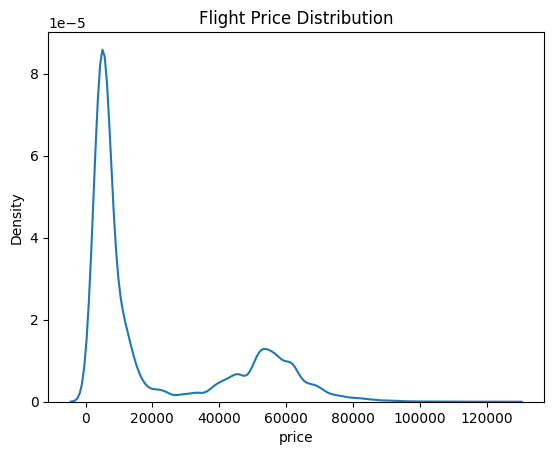

In [ ]:
sns.kdeplot(df['price'])
plt.title("Flight Price Distribution")
plt.show()

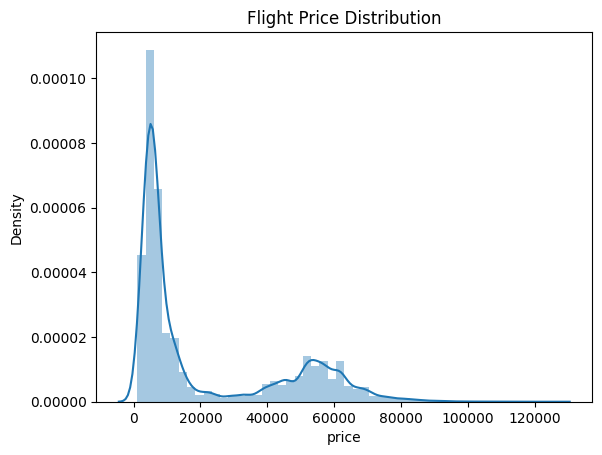

In [ ]:
sns.distplot(df['price'])
plt.title("Flight Price Distribution")
plt.show()

In [ ]:
df['price'].skew()

np.float64(1.0621679729942997)

In [ ]:
df['price'].kurtosis()

np.float64(-0.39565192122102966)

In [ ]:
fig = px.box(df, y="price", title="Flight Price Distribution",
             boxmode="overlay",
             template="plotly_dark")  # Use a dark theme

fig.update_traces(marker=dict(color="red"),  # Customize outlier color
                  boxmean=True)  # Show mean as a line

fig.update_layout(yaxis_title="Price (INR)", xaxis_title="Flights",
                  width=800, height=500)  # Customize size

fig.show()

In [ ]:
# Tukey’s Fences (IQR Method)
df[df['price']>100616]

flight_year  flight_month  flight_day flight_date  airline     class  \
215964         2023             6          26  2023-06-26  Vistara  business   
215965         2023             6          26  2023-06-26  Vistara  business   
216131         2023             6          29  2023-06-29  Vistara  business   
216201         2023             6          30  2023-06-30  Vistara  business   
216202         2023             6          30  2023-06-30  Vistara  business   
...             ...           ...         ...         ...      ...       ...   
293580         2023             6          28  2023-06-28  Vistara  business   
296107         2023             6          28  2023-06-28  Vistara  business   
296187         2023             6          30  2023-06-30  Vistara  business   
296276         2023             7           2  2023-07-02  Vistara  business   
296510         2023             7           7  2023-07-07  Vistara  business   

       departure_city  departure_time arrival_city  arrival_time  duration  \
215964          Delhi            1190      Kolkata          1015      1265   
215965          Delhi            1190      Kolkata          1015      1265   
216131          Delhi             965      Kolkata           580      1055   
216201          Delhi             530      Kolkata          1010       480   
216202          Delhi             355      Kolkata          1010       655   
...               ...             ...          ...           ...       ...   
293580        Chennai             645    Bangalore          1225       580   
296107        Chennai            1265      Kolkata           515       690   
296187        Chennai             415      Kolkata          1365       950   
296276        Chennai            1265      Kolkata           515       690   
296510        Chennai            1265      Kolkata          1085      1260   

         price  Stops  
215964  116151      2  
215965  118310      2  
216131  101901      2  
216201  102890      1  
216202  119067      2  
...        ...    ...  
293580  109211      1  
296107  104374      1  
296187  103920      1  
296276  106193      1  
296510  103920      1  

[122 rows x 13 columns]

In [ ]:
test_stats,p_value=shapiro(df['price'])
print(f"shapiro wilk test Test: Statistic={test_stats}, p-value={p_value}")

shapiro wilk test Test: Statistic=0.751455368575974, p-value=4.7020032142838126e-164


In [ ]:
if p_value>0.05:
  print('Data is normally distributed')
else:
  print('Data is not  normally distributed')

Data is not  normally distributed


In [ ]:
stat, p = kstest(df['price'], 'norm')
print(f"Kolmogorov-Smirnov Test: Statistic={stat}, p-value={p}")
if p>0.05:
  print('Data is normally distributed')
else:
  print('Data is not  normally distributed')

Kolmogorov-Smirnov Test: Statistic=1.0, p-value=0.0
Data is not  normally distributed


In [ ]:
# Define threshold (commonly used: ±3)
theshold=3
outliers=df[(zscore(df['price'])>3) | (zscore(df['price'])<-3)]
len(outliers)

602

In [ ]:
outliers.sample(10)

flight_year  flight_month  flight_day flight_date  airline     class  \
230866         2023             7           5  2023-07-05  Vistara  business   
270669         2023             7           3  2023-07-03  Vistara  business   
230511         2023             7           1  2023-07-01  Vistara  business   
248833         2023             6          27  2023-06-27  Vistara  business   
290989         2023             7           5  2023-07-05  Vistara  business   
230192         2023             6          27  2023-06-27  Vistara  business   
234334         2023             6          27  2023-06-27  Vistara  business   
272310         2023             8           5  2023-08-05  Vistara  business   
230196         2023             6          27  2023-06-27  Vistara  business   
290548         2023             6          28  2023-06-28  Vistara  business   

       departure_city  departure_time arrival_city  arrival_time  duration  \
230866         Mumbai            1185    Bangalore           650       905   
270669        Kolkata             625    Hyderabad          1375       750   
230511         Mumbai             525    Bangalore          1225       700   
248833      Bangalore             690       Mumbai          1205       515   
290989        Chennai            1265       Mumbai           670       845   
230192         Mumbai            1055    Bangalore          1130      1515   
234334         Mumbai            1055      Kolkata          1245      1630   
272310        Kolkata             625    Hyderabad          1375       750   
230196         Mumbai            1110    Bangalore          1360      1690   
290548        Chennai            1265       Mumbai          1320      1495   

         price  Stops  
230866   94579      1  
270669   99146      1  
230511   96739      1  
248833   92081      1  
290989   94598      1  
230192  103940      1  
234334   91055      1  
272310   91075      1  
230196  107350      1  
290548   99827      1

#`duration`
##`duration column have some potential outliers and probability distribution is slightly right skewed`


In [ ]:
df['duration'].describe()

count    300259.000000
mean        733.061540
std         431.576729
min           0.000000
25%         405.000000
50%         675.000000
75%         970.000000
max        2990.000000
Name: duration, dtype: float64

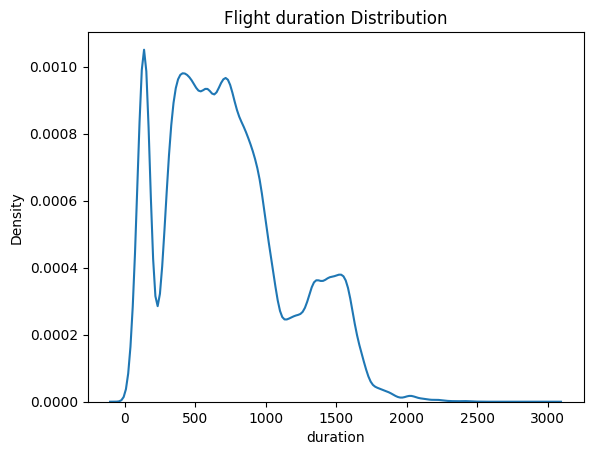

In [ ]:
sns.kdeplot(df['duration'])
plt.title("Flight duration Distribution")
plt.show()

In [ ]:
df['duration'].skew()

np.float64(0.6029637697494438)

In [ ]:
df['duration'].kurtosis()

np.float64(-0.2689767367039555)

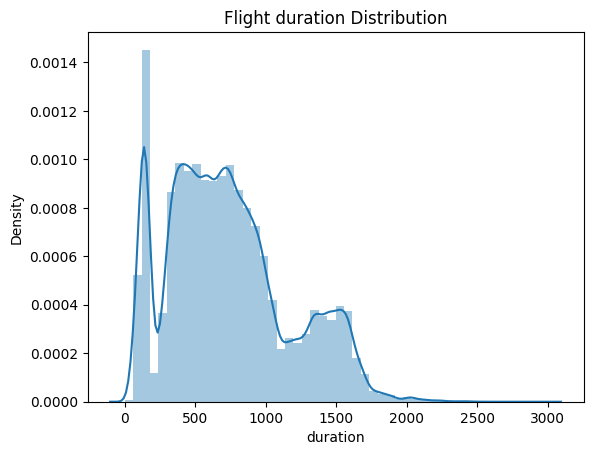

In [ ]:
sns.distplot(df['duration'])
plt.title("Flight duration Distribution")
plt.show()

In [ ]:
fig = px.box(df, y="duration", title="Flight duration Distribution",
             boxmode="overlay",
             template="plotly_dark")  # Use a dark theme

fig.update_traces(marker=dict(color="red"),  # Customize outlier color
                  boxmean=True)  # Show mean as a line

fig.update_layout(yaxis_title="duration", xaxis_title="Flights",
                  width=800, height=500)  # Customize size

fig.show()

In [ ]:
#Tukey’s Fences (IQR Method)
df[df['duration']>1815]

flight_year  flight_month  flight_day flight_date    airline  \
10534          2023             6          29  2023-06-29    Vistara   
10535          2023             6          29  2023-06-29    Vistara   
10540          2023             6          29  2023-06-29  Air India   
10891          2023             7           1  2023-07-01    Vistara   
10892          2023             7           1  2023-07-01    Vistara   
...             ...           ...         ...         ...        ...   
296170         2023             6          30  2023-06-30  Air India   
296403         2023             7           5  2023-07-05  Air India   
296497         2023             7           7  2023-07-07  Air India   
296822         2023             7          14  2023-07-14  Air India   
297767         2023             8           4  2023-08-04  Air India   

           class departure_city  departure_time arrival_city  arrival_time  \
10534    economy          Delhi             820    Bangalore          1255   
10535    economy          Delhi             820    Bangalore          1370   
10540    economy          Delhi             335    Bangalore          1110   
10891    economy          Delhi             820    Bangalore          1255   
10892    economy          Delhi             820    Bangalore          1370   
...          ...            ...             ...          ...           ...   
296170  business        Chennai             370      Kolkata           750   
296403  business        Chennai             370      Kolkata           750   
296497  business        Chennai             370      Kolkata           750   
296822  business        Chennai             370      Kolkata           750   
297767  business        Chennai             370      Kolkata           750   

        duration  price  Stops  
10534       1875  12344      2  
10535       1990  12344      2  
10540       2215  12444      2  
10891       1875  12344      2  
10892       1990  12344      2  
...          ...    ...    ...  
296170      1820  56208      1  
296403      1820  56208      1  
296497      1820  56208      1  
296822      1820  56208      1  
297767      1820  56208      1  

[2004 rows x 13 columns]

In [ ]:
# Define threshold (commonly used: ±3)
theshold=3
outliers=df[(zscore(df['duration'])>3) | (zscore(df['duration'])<-3)]
len(outliers)

722

In [ ]:
outliers.sample(10)

flight_year  flight_month  flight_day flight_date    airline  \
171666         2023             7           5  2023-07-05  Air India   
94120          2023             6          26  2023-06-26  Air India   
136838         2023             7           6  2023-07-06  Air India   
261258         2023             8          11  2023-08-11  Air India   
62956          2023             7           5  2023-07-05  Air India   
70429          2023             6          27  2023-06-27  Air India   
84767          2023             6          30  2023-06-30    Vistara   
268754         2023             7          18  2023-07-18    Vistara   
183844         2023             7          20  2023-07-20    Vistara   
196633         2023             7          30  2023-07-30  Air India   

           class departure_city  departure_time arrival_city  arrival_time  \
171666   economy      Hyderabad             390      Kolkata          1205   
94120    economy      Bangalore             370       Mumbai          1245   
136838   economy        Kolkata             810    Bangalore            10   
261258  business      Bangalore            1150      Chennai          1135   
62956    economy         Mumbai             420      Kolkata          1205   
70429    economy         Mumbai             635    Hyderabad          1250   
84767    economy      Bangalore             400        Delhi           990   
268754  business        Kolkata             430    Bangalore          1095   
183844   economy        Chennai             420        Delhi          1010   
196633   economy        Chennai             510    Bangalore          1110   

        duration  price  Stops  
171666      2255  12319      2  
94120       2315  21035      1  
136838      2080  12920      1  
261258      2865  55949      1  
62956       2225  12127      1  
70429       2055  10885      1  
84767       2030  12409      1  
268754      2105  76683      1  
183844      2030   7551      1  
196633      2040   5698      1

#`arrival_time`
- `Probability distribution is slightly left and there are no potential outliers acc. to IQR method`


In [ ]:
df['arrival_time'].describe()

count    300259.000000
mean        943.823432
std         363.093213
min           5.000000
25%         635.000000
50%        1025.000000
75%        1245.000000
max        1439.000000
Name: arrival_time, dtype: float64

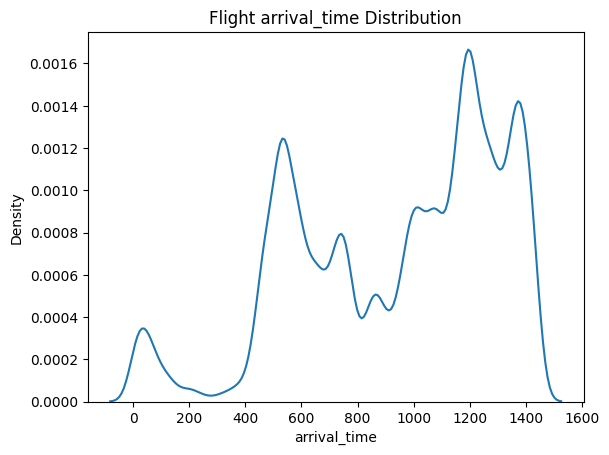

In [ ]:
sns.kdeplot(df['arrival_time'])
plt.title("Flight arrival_time Distribution")
plt.show()

In [ ]:
df['arrival_time'].skew()

np.float64(-0.6183893698970376)

In [ ]:
df['arrival_time'].kurtosis()

np.float64(-0.48469039275888504)

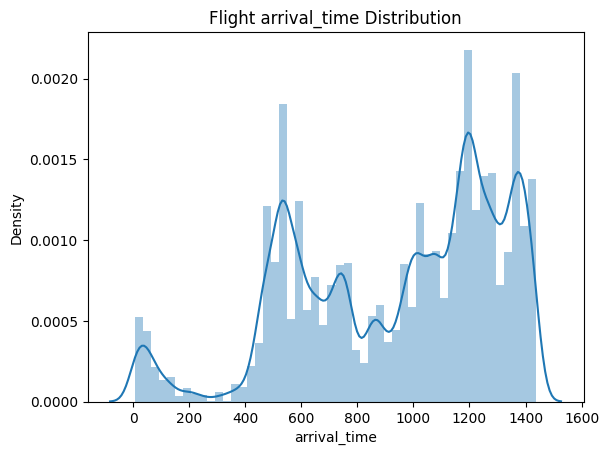

In [ ]:
sns.distplot(df['arrival_time'])
plt.title("Flight arrival_time Distribution")
plt.show()

In [ ]:
fig = px.box(df, y="arrival_time", title="Flight arrival_time Distribution",
             boxmode="overlay",
             template="plotly_dark")  # Use a dark theme

fig.update_traces(marker=dict(color="red"),  # Customize outlier color
                  boxmean=True)  # Show mean as a line

fig.update_layout(yaxis_title="arrival_time", xaxis_title="Flights",
                  width=800, height=500)  # Customize size

fig.show()

#`departure_time`
- `Probability distribution is symmetric and there are no potential outliers acc. to IQR method`

In [ ]:
df['departure_time'].describe()

count    300259.000000
mean        806.031476
std         323.359577
min          10.000000
25%         510.000000
50%         775.000000
75%        1110.000000
max        1435.000000
Name: departure_time, dtype: float64

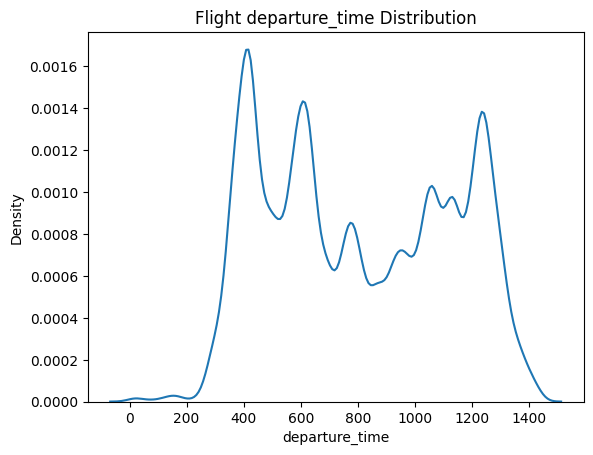

In [ ]:
sns.kdeplot(df['departure_time'])
plt.title("Flight departure_time Distribution")
plt.show()

In [ ]:
df['departure_time'].skew()

np.float64(0.10212579655554298)

In [ ]:
df['departure_time'].kurtosis()

np.float64(-1.3281057042313567)

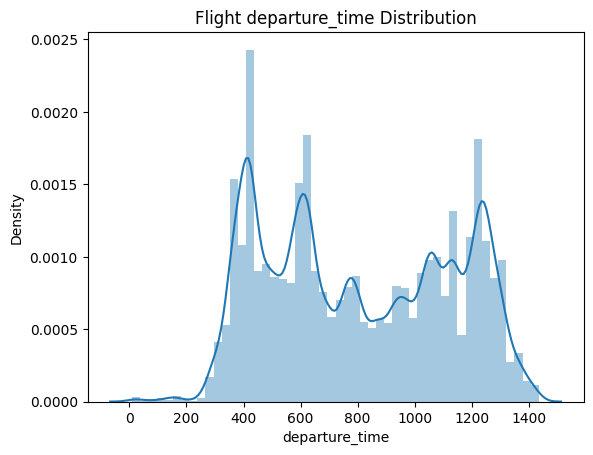

In [ ]:
sns.distplot(df['departure_time'])
plt.title("Flight departure_time Distribution")
plt.show()

In [ ]:
fig = px.box(df, y="departure_time", title="Flight depature_time Distribution",
             boxmode="overlay",
             template="plotly_dark")  # Use a dark theme

fig.update_traces(marker=dict(color="red"),  # Customize outlier color
                  boxmean=True)  # Show mean as a line

fig.update_layout(yaxis_title="depature_time", xaxis_title="Flights",
                  width=800, height=500)  # Customize size

fig.show()

#`Steps of doing Univariate Analysis on Categorical columns`

`Descriptive Statistics`: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

`Visualizations`: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

`Missing Values:` Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

`Conclusion`: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#`Airlines`
# - `70% of flights are from vistara or airindia`

In [ ]:
df['airline'].value_counts()

airline
Vistara      127859
Air India     80892
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

In [ ]:
fig = px.bar(df, x=df["airline"].value_counts().index,
             y=df["airline"].value_counts().values,
             title="Airline Distribution",
             labels={"x": "Airline", "y": "Count"},
             color=df["airline"].value_counts().index,text_auto=True)
fig.show()

In [ ]:
fig = px.pie(df, names=df["airline"].value_counts().index,
             values=df["airline"].value_counts().values,
             title="Airline Distribution")
fig.show()

##`Using ANOVA  to check variance amoung all airlines prices`

In [ ]:
groups=[df['price'][df['airline']==airline] for airline in df['airline'].unique()]
stat, p = f_oneway(*groups)
print(f"ANOVA Test: Statistic={stat}, p-value={round(p,6)}")

if p < 0.05:
    print("Significant difference in price across airlines")
else:
    print("No significant difference")

ANOVA Test: Statistic=12286.80929022124, p-value=0.0
Significant difference in price across airlines


#`class`

In [ ]:
df['class'].value_counts()

class
economy     206772
business     93487
Name: count, dtype: int64

In [ ]:
fig = px.bar(x=df["class"].value_counts().index,
             y=df["class"].value_counts().values,
             title="flight class Distribution",
             labels={"x": "flight class", "y": "Count"},
             color=df["class"].value_counts().index,text_auto=True)
fig.show()

In [ ]:
fig = px.pie(df, names=df["class"].value_counts().index,
             values=df["class"].value_counts().values,
             title="class Distribution")
fig.show()

#`departure_city`

In [ ]:
df['departure_city'].value_counts()

departure_city
Delhi        61343
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

In [ ]:
fig = px.bar(x=df["departure_city"].value_counts().index,
             y=df["departure_city"].value_counts().values,
             title="departure_city Distribution",
             labels={"x": "departure_city", "y": "Count"},
             color=df["departure_city"].value_counts().index,text_auto=True)
fig.show()

In [ ]:
fig = px.pie(df, names=df["departure_city"].value_counts().index,
             values=df["departure_city"].value_counts().values,
             title="departure_city Distribution")
fig.show()

In [ ]:
df['arrival_city'].value_counts()

arrival_city
Mumbai       59107
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

In [ ]:
fig = px.bar(x=df["arrival_city"].value_counts().index,
             y=df["arrival_city"].value_counts().values,
             title="arrival_city Distribution",
             labels={"x": "arrival_city", "y": "Count"},
             color=df["arrival_city"].value_counts().index,text_auto=True)
fig.show()

In [ ]:
fig = px.pie(df, names=df["arrival_city"].value_counts().index,
             values=df["arrival_city"].value_counts().values,
             title="arrival_city Distribution")
fig.show()

In [ ]:
df['Stops'].value_counts()

Stops
1    250927
0     36044
2     13288
Name: count, dtype: int64

In [ ]:
fig = px.bar(x=df["Stops"].value_counts().index,
             y=df["Stops"].value_counts().values,
             title="Stops Distribution",
             labels={"x": "Stops", "y": "Count"},
             color=df["Stops"].value_counts().index,text_auto=True)
fig.show()

In [ ]:
fig = px.pie(df, names=df["Stops"].value_counts().index,
             values=df["Stops"].value_counts().values,
             title="Stops Distribution")
fig.show()

In [ ]:
df['flight_date']=pd.to_datetime(df['flight_date'],dayfirst=True)

#`AS day_of_week and IS_holiday HAVE SIGNIFICANT INPACT ON RPICE SO WE CAN USE IT AS A FEATURE`

In [ ]:
df.insert(2, 'day_of_week', df['flight_date'].dt.day_of_week)

In [ ]:
df.head()

flight_year  flight_month  is_hoiliday  day_of_week  day  flight_day  \
0         2023             6            0            0    0          26   
1         2023             6            0            0    0          26   
2         2023             6            0            0    0          26   
3         2023             6            0            0    0          26   
4         2023             6            0            0    0          26   

  flight_date   airline    class departure_city  departure_time arrival_city  \
0  2023-06-26  SpiceJet  economy          Delhi            1135       Mumbai   
1  2023-06-26  SpiceJet  economy          Delhi             380       Mumbai   
2  2023-06-26   AirAsia  economy          Delhi             265       Mumbai   
3  2023-06-26   Vistara  economy          Delhi             620       Mumbai   
4  2023-06-26   Vistara  economy          Delhi             530       Mumbai   

   arrival_time  duration  price  Stops  
0          1265       130   6013      0  
1           520       140   6013      0  
2           395       130   6016      0  
3           755       135   6015      0  
4           670       140   6015      0

In [ ]:
import datetime
import holidays
indian_holidays = holidays.India()

In [ ]:
df['is_hoiliday']=df['flight_date'].apply(lambda x: 1 if x in indian_holidays else 0)

In [ ]:
df.insert(loc=2, column='is_hoiliday', value=df.pop('is_hoiliday'))

#`remove unnecessary columns`

In [ ]:
df=df.drop(columns=['day','flight_day','flight_date'])
df.shape

(300259, 13)

In [ ]:
df.sample(10)

flight_year  flight_month  is_hoiliday  day_of_week    airline  \
90874          2023             7            0            6    AirAsia   
211763         2023             8            0            4    Vistara   
87582          2023             7            0            4     Indigo   
54027          2023             7            0            1  Air India   
79084          2023             7            0            0   GO FIRST   
121144         2023             7            0            4   SpiceJet   
64392          2023             7            0            3   SpiceJet   
231962         2023             7            0            1  Air India   
13872          2023             7            0            6    Vistara   
112364         2023             7            0            2  Air India   

           class departure_city  departure_time arrival_city  arrival_time  \
90874    economy      Bangalore             955        Delhi            70   
211763  business          Delhi             700       Mumbai           840   
87582    economy      Bangalore             400        Delhi           570   
54027    economy         Mumbai            1080    Bangalore           535   
79084    economy         Mumbai            1155      Chennai            70   
121144   economy        Kolkata             870        Delhi           640   
64392    economy         Mumbai             895      Kolkata          1290   
231962  business         Mumbai            1290    Bangalore           750   
13872    economy          Delhi             545    Bangalore           710   
112364   economy      Bangalore            1260    Hyderabad           715   

        duration  price  Stops  
90874        555   2750      1  
211763       140  29305      0  
87582        170   4545      0  
54027        895   9293      1  
79084        355   6001      1  
121144      1210   6553      1  
64392        395   5386      1  
231962       900  55427      1  
13872        165   4546      0  
112364       895   6262      1

#`WE can also add a columns price category not for model building only for EDA and inference because it may leak some info of price in model training phase`

In [ ]:
df['price'].describe()

count    300259.000000
mean      21174.447460
std       23048.549457
min        1116.000000
25%        4831.000000
50%        7499.000000
75%       43159.000000
max      124917.000000
Name: price, dtype: float64

In [ ]:
df['price'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]).values

array([  1116.,   4437.,   6194.,  11180.,  50471., 124917.])

In [ ]:
quantiles = df['price'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]).values
labels = ['Low', 'Medium', 'High', 'Very High', 'Luxury']

In [ ]:
df['price_category']=pd.cut(df['price'],bins=quantiles,labels=labels, include_lowest=True)

In [ ]:
df['price_category'].value_counts()

price_category
Very High    60403
Medium       60198
Low          60078
High         60014
Luxury       59566
Name: count, dtype: int64

In [ ]:
fig = px.bar(x=df['price_category'].value_counts().index,
             y=df['price_category'].value_counts().values,
             title="price_category Distribution",
             labels={"x": "price_category", "y": "Count"},
             color=df['price_category'].value_counts().index,text_auto=True)
fig.show()

In [ ]:
fig = px.pie(df, names=df['price_category'].value_counts().index,
             values=df['price_category'].value_counts().values,
             title="price category Distribution")
fig.show()

#`suprisingly price category column is appox full balance `

In [ ]:
df.shape

(300259, 14)

In [ ]:
df

flight_year  flight_month  is_hoiliday  day_of_week   airline  \
0              2023             6            0            0  SpiceJet   
1              2023             6            0            0  SpiceJet   
2              2023             6            0            0   AirAsia   
3              2023             6            0            0   Vistara   
4              2023             6            0            0   Vistara   
...             ...           ...          ...          ...       ...   
300254         2023             8            0            6   Vistara   
300255         2023             8            0            6   Vistara   
300256         2023             8            0            6   Vistara   
300257         2023             8            0            6   Vistara   
300258         2023             8            0            6   Vistara   

           class departure_city  departure_time arrival_city  arrival_time  \
0        economy          Delhi            1135       Mumbai          1265   
1        economy          Delhi             380       Mumbai           520   
2        economy          Delhi             265       Mumbai           395   
3        economy          Delhi             620       Mumbai           755   
4        economy          Delhi             530       Mumbai           670   
...          ...            ...             ...          ...           ...   
300254  business        Chennai             585    Hyderabad          1190   
300255  business        Chennai             750    Hyderabad          1375   
300256  business        Chennai             425    Hyderabad          1255   
300257  business        Chennai             420    Hyderabad          1020   
300258  business        Chennai             585    Hyderabad          1190   

        duration  price  Stops price_category  
0            130   6013      0         Medium  
1            140   6013      0         Medium  
2            130   6016      0         Medium  
3            135   6015      0         Medium  
4            140   6015      0         Medium  
...          ...    ...    ...            ...  
300254       605  70304      1         Luxury  
300255       625  78262      1         Luxury  
300256       830  80285      1         Luxury  
300257       600  82809      1         Luxury  
300258       605  82809      1         Luxury  

[300259 rows x 14 columns]

In [ ]:
df.to_csv('Data_after_Univariate Analysis',index=False)